In [28]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [45]:
size = 10000
w1 = 0.5
w2 = 0.3
w3 = 0.2
rv1 = norm.rvs(loc = 3, scale = 2, size = int(size * w1))
rv2 = norm.rvs(loc = 10, scale = 5, size = int(size * w2))
rv3 = norm.rvs(loc = -10, scale = 9, size = int(size * w3))
w = [ int(size *w1), int(size *w2), int(size *w3)]
display(w)
rv = [rv1, rv2, rv3]
display(rv)
display(np.concatenate((
    np.random.choice(rv[:], 2, replace = False))
))


[5000, 3000, 2000]

[array([4.10577481, 4.97818589, 2.40565023, ..., 4.93900482, 5.65335051,
        3.77800895]),
 array([ 9.77623601, 10.60080041,  5.68989404, ...,  6.33784917,
        11.82222219, 10.71184449]),
 array([-16.74379021,  -7.35806659,   0.64758724, ..., -16.44389084,
        -18.81719743,  -3.31944467])]

array([ 9.77623601, 10.60080041,  5.68989404, ...,  4.93900482,
        5.65335051,  3.77800895])

In [46]:
def test_n(rv, w, n = 1000, sizes = [40, 500]):
    rva = np.concatenate((rv))
    muRva = list()
    stdRva = list()
    
    muProp = list()
    stdProp = list()
    
    muOpt = list()
    stdOpt = list()
    
    stdK = list()
    sumToDivide = 0
    for i in range(0, len(rv)):
        stdK.append(np.std(rv[i]))
        sumToDivide += (w[i] * np.std(rv[i]))
        
    for size in sizes:
        for i in range(0, n):
            rvaSample = np.random.choice(rva, size, replace = False)
            muRva.append(np.mean(rvaSample))
            stdRva.append(np.std(rvaSample))
            
            propSample = list()
            for j in range(0, len(rv)):
                propSample = np.concatenate((
                    propSample,
                    np.random.choice(rv[j], int(size * w[j]), replace = False)
                ))
            muProp.append(np.mean(propSample))
            stdProp.append(np.std(propSample))
            
            optSample = list()
            for j in range(0, len(rv)):
                sizeK = int(size * w[j] * stdK[j] / sumToDivide)
                optSample = np.concatenate((
                    optSample,
                    np.random.choice(rv[j], sizeK, replace = False)
                ))
            muOpt.append(np.mean(optSample))
            stdOpt.append(np.std(optSample))
            
    return muRva, stdRva, muProp, stdProp, muOpt, stdOpt

In [47]:
muRva, stdRva, muProp, stdProp, muOpt, stdOpt = test_n([rv1, rv2, rv3], [w1, w2, w3])



{'whiskers': [<matplotlib.lines.Line2D at 0x7f0ebe0bc6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0ebe0bcd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0ebe0bc550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0ebe0c4400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ebe0c4748>,
 'means': []}

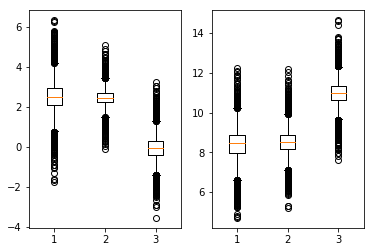

In [48]:
ax1 = plt.subplot(121)
plt.boxplot([muRva, muProp, muOpt])

plt.subplot(122)
plt.boxplot([stdRva, stdProp, stdOpt])



# ax1 = plt.subplot(231)
# plt.boxplot(muRva)

# ax2 = plt.subplot(232, sharey = ax1)
# plt.boxplot(muProp)

# ax3 = plt.subplot(233, sharey = ax1)
# plt.boxplot(muOpt)

# ax4 = plt.subplot(234)
# plt.boxplot(stdRva)

# ax5 = plt.subplot(235, sharey = ax4)
# plt.boxplot(stdProp)

# ax6 = plt.subplot(236, sharey = ax4)
# plt.boxplot(stdOpt)

# axs[0].boxplot(stdRva)
# axs[1].boxplot(stdProp, sharex = axs)
# axs[2].boxplot(stdOpt)

In [6]:
display(
    np.std(stdRva[int(len(stdRva)/2):]),
    np.std(stdProp[int(len(stdProp)/2):]),
    np.std(stdOpt[int(len(stdOpt)/2):]))

0.09449655411167981

0.09428503654160252

0.09431088198603912